# Text2Cypher Graph Agent Demo

In [1]:
import os
import sys
sys.path.append("../")

from langchain.graphs import Neo4jGraph
from dotenv import load_dotenv

load_dotenv()

from src.ps_genai_agents.agents.graph.text2cypher import create_text2cypher_graph_agent

In [3]:
example_queries_loc = "../data/patient_journey/queries/queries.yml"
graph = Neo4jGraph(
            url=os.environ.get("PJ_NEO4J_URI"),
            username=os.environ.get("PJ_NEO4J_USERNAME"),
            password=os.environ.get("PJ_NEO4J_PASSWORD"),
            enhanced_schema=True,
            driver_config={"liveness_check_timeout": 0},
        )
agent = create_text2cypher_graph_agent(neo4j_graph=graph, example_queries_location=example_queries_loc)

Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.FeatureDeprecationWarning} {category: DEPRECATION} {title: This feature is deprecated and will be removed in future versions.} {description: The procedure has a deprecated field. ('config' used by 'apoc.meta.graphSample' is deprecated.)} {position: line: 1, column: 1, offset: 0} for query: "CALL apoc.meta.graphSample() YIELD nodes, relationships RETURN nodes, [rel in relationships | {name:apoc.any.property(rel, 'type'), count: apoc.any.property(rel, 'count')}] AS relationships"
Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.AggregationSkippedNull} {category: UNRECOGNIZED} {title: The query contains an aggregation function that skips null values.} {description: null value eliminated in set function.} {position: None} for query: 'MATCH (n:`Event`)\nWITH min(n.`code`) AS `code_min`,\n     max(n.`code`) AS `code_max`,\n     count(distinct 

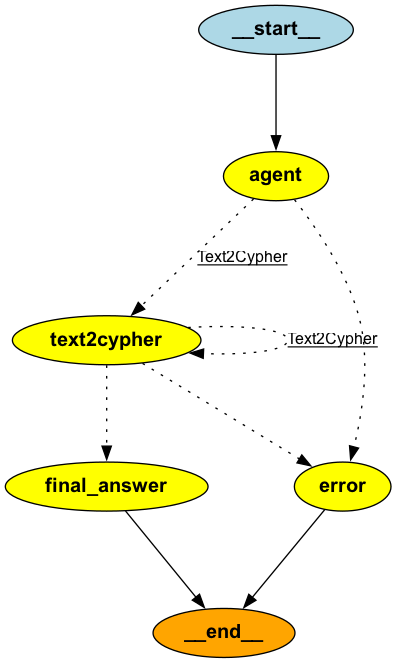

In [4]:
from IPython.display import Image

Image(agent.get_graph().draw_png())

In [6]:
res = agent.invoke(
    {
        "input": "what are common drugs for patients over age 50",
        "chat_history": [],
    }
)

> run_agent
initial data:  {'input': 'what are common drugs for patients over age 50', 'sub_questions': None, 'chat_history': [], 'agent_outcome': None, 'intermediate_steps': [], 'cypher': None, 'cypher_result': None}
tool='Text2Cypher' tool_input={'query': 'What are common drugs for patients over age 50?'} log="\nInvoking: `Text2Cypher` with `{'query': 'What are common drugs for patients over age 50?'}`\n\n\n" message_log=[AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_bXFLyVe800wguWtdArNHoS7A', 'function': {'arguments': '{"query":"What are common drugs for patients over age 50?"}', 'name': 'Text2Cypher'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 205, 'total_tokens': 231, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-4o-2024-05-13', 'system_fingerprint': 'fp_e375328146', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-ace168db-852b-4c89-bad1-a2f49c49d

In [7]:
res["agent_outcome"].display()


Question:
what are common drugs for patients over age 50

Sub Questions:
What are common drugs for patients over age 50?

            
Cypher:
cypher
MATCH (e:Encounter)
WHERE e.patientAge > 50
MATCH (e)-[:HAS_DRUG]->(d)
WITH d.description as drug, count(*) as cnt
ORDER BY cnt desc
RETURN drug, cnt




Cypher Result:
[{'drug': 'insulin human  isophane 70 UNT/ML / Regular Insulin  Human 30 UNT/ML Injectable Suspension [Humulin]', 'cnt': 35316}, {'drug': 'lisinopril 10 MG Oral Tablet', 'cnt': 27301}, {'drug': '24 HR Metformin hydrochloride 500 MG Extended Release Oral Tablet', 'cnt': 23689}, {'drug': 'Hydrochlorothiazide 25 MG Oral Tablet', 'cnt': 22638}, {'drug': 'amLODIPine 2.5 MG Oral Tablet', 'cnt': 21878}, {'drug': '1 ML Epoetin Alfa 4000 UNT/ML Injection [Epogen]', 'cnt': 21331}, {'drug': 'Simvastatin 10 MG Oral Tablet', 'cnt': 18841}, {'drug': 'Warfarin Sodium 5 MG Oral Tablet', 'cnt': 10722}, {'drug': 'Digoxin 0.125 MG Oral Tablet', 'cnt': 10722}, {'drug': 'Nitroglycerin 0.4 MG/